In [1]:
# Please, ignore these lines of code for a moment, they simply import a lot of differently functions for calcuations
# and plotting.
import matplotlib.pyplot as plt
import matplotlib.animation
import IPython
import numpy as np
import sympy as sp
%matplotlib inline
#plt.xkcd()
sp.init_printing(use_latex=True)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'text.usetex':True}
plt.rcParams.update(params)
def print_latex(desc,formula): display(IPython.display.Latex(desc+" $"+sp.latex(formula)+"$"))

# Taylor Expansions in one dimension

We start of to generate some plots to illustrate the behaviour of Taylor Expansions.
Some technical details will be explained later, like for example the Landau-$\mathcal{O}$ notation.

To shorten the code, we use the *SymPy*, a library for symbolic computation.

### Taylor Expansion of the Sine function

As a first motivation example we start with a nice analytic function, the trigeometric Sine function.
In fact the Taylor Expansion converges on $\mathbb{R}$, in this case we get also a nice global behaviour.

But it's always important to note, that this is a special case!

<IPython.core.display.Latex object>

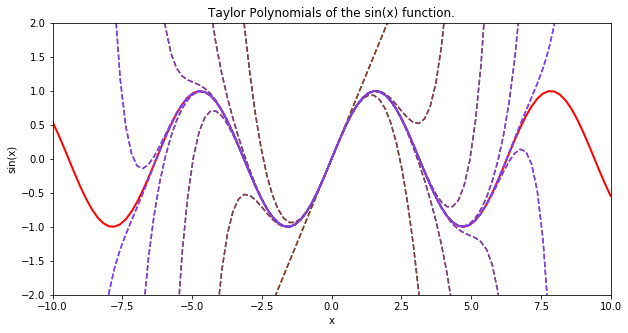

In [52]:
# for the symbolic computation we have to initialize a symbolic variable 'x'
x = sp.symbols('x')

# now we use the symbolic toolbox and the predefined 'sin' function.
# Note the prefix 'sp.' which states that we want to use the implementation of 'sin'
# provided by the sympy module.
f = sp.sin(x)

# to generate some plots, we use the package matplotlib
# similar like in MATLAB we generate an array of parameters 'x = linspace(...)'
X = np.linspace(-10,10,100)

# now we plot the sin function
plt.plot(X, np.sin(X),linewidth=2,color=[1,0,0])

# from 2 till 20 we compute the taylor expansion of the sin function
# around the point x_0 = 0
for order in range(2,20):
    
    # the function sp.series computes a symbolic expession for the taylor series
    f_approx = sp.series(f,x,x0=0.,n=order)
    
    # this step is a bit technical, but to get a fast numerical function,
    # we can use the sp.lambdify function, which converts a symbolic expression into
    # a normal python function
    f_num = sp.lambdify(x,f_approx.removeO())
    
    # now we plot the taylor polynomials
    plt.plot(X,f_num(X),'--',color=[0.5,0.25,order/20])
    
# we choose the domain we want to plot, here x = [-10,10], y = [-2,2]
plt.axis([-10,10,-2,2])
plt.xlabel('x'); plt.ylabel('sin(x)'); plt.title('Taylor Polynomials of the sin(x) function.')

# finally we print the last Taylor Polynomial
print_latex("$f(x) = $",f_approx)
plt.savefig('sin_20.png')

### The typical counterexample for global convergence

In Taylor's Theorem we get control over the remainder, but only on a certain domain, i.e. locally.
For smooth $\mathcal{C}^{\infty}$ function $f$, the Taylor series may converge globally, but it's limit is not $f$
but another function. A classical counterexample is 

$f(x) = \begin{cases} \mathrm{exp}\left(\frac{-1}{x^2}\right) \quad &\text{for $x \neq 0,$} \\ 0 \quad&\text{else}.\end{cases}$

<IPython.core.display.Latex object>

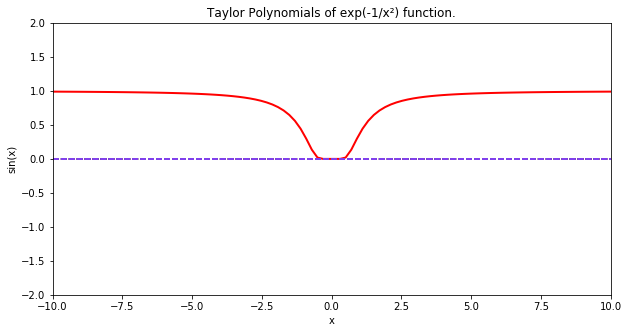

In [53]:
x = sp.symbols('x')
f = sp.exp(-1/(x*x))

X = np.linspace(-10,10,100)
plt.plot(X, np.exp(-1/(X*X)), linewidth=2, color=[1,0,0])

for order in range(3,20):
    
    # the function sp.series computes a symbolic expession for the taylor series
    f_approx = sp.series(f,x,x0=0.,n=order)
    
    # now we plot the taylor polynomials, note the we need to remove the remainder term
    # form the symbolic expression. removeO() just removes the O(x^n) term.
    # after that we only have a polynomial of order n left, which can be plotted.
    f_num = sp.lambdify(x,f_approx.removeO())
    plt.plot(X,f_num(X)+0.*X,'--',color=[0.5,0.25,order/20])
    
plt.axis([-10,10,-2,2])
plt.xlabel('x'); plt.ylabel('sin(x)'); plt.title('Taylor Polynomials of exp(-1/x²) function.')
print_latex("$f(x) = 0 + $",f_approx)
plt.savefig('exp_singular.png')

### Counterexample: No global convergence

The last example had a bitter taste, since the singularity of $\frac{1}{x^2}$ in the exponent already looks quite suspicious. But even if we replace this non smooth exponent by a smooth function, the Taylor series still lacks global convergence.

<IPython.core.display.Latex object>

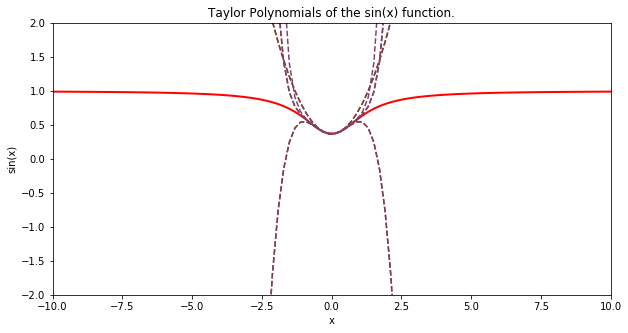

In [54]:
x = sp.symbols('x')
f = sp.exp(-1/(x*x+1))

X = np.linspace(-10,10,100)
plt.plot(X, np.exp(-1/(X*X+1)), linewidth=2, color=[1,0,0])

for order in range(3,10):
    
    # the function sp.series computes a symbolic expession for the taylor series
    f_approx = sp.series(f,x,x0=0.,n=order)
    
    # now we plot the taylor polynomials
    f_num = sp.lambdify(x,f_approx.removeO())
    plt.plot(X,f_num(X)+0.*X,'--',color=[0.5,0.25,order/20])
    
plt.axis([-10,10,-2,2])
plt.xlabel('x'); plt.ylabel('sin(x)'); plt.title('Taylor Polynomials of the sin(x) function.')
print_latex("$f(x) = 0 + $",f_approx)
plt.savefig('exp_nonsigular.png')

In [27]:
x, x0, h = sp.symbols('x, x0, h')
f = sp.Function('f')(x)

order_one = sp.series(f,x,x0=x0,n=4)
print_latex("$f(x)=$",order_one)

<IPython.core.display.Latex object>

# Multidimensional Taylor Expansions

Now the syntax becomes more involved..

In [255]:
from mpl_toolkits.mplot3d import axes3d
from   matplotlib import cm

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'text.usetex':True}
plt.rcParams.update(params)

def plot(F_num,DF_num,cont=True):
    ax  = plt.gca(projection='3d')

    # plot vector field (on the z=-1 plane)
    x,y = np.mgrid[ -1:1:8j , -1:1:8j ]
    V = DF_num(x,y)
    ax.quiver( x, y, -1., V[0], V[1], 0, pivot='middle', length=0.1)

    # plot surface and contourlines of the streamfunction
    x,y = np.mgrid[ -1:1:100j , -1:1:100j ]
    
    Z = F_num(x,y)
    ax.contour( x, y, Z, 20, cmap=cm.coolwarm, linewidths=3, offset=-1., zdir='z' )
    
    if(cont):
        ax.contour( x, y, Z+0.02, 10, cmap=cm.coolwarm, linewidths=3)
    ax.plot_surface( x, y, Z, rstride=8, cstride=8, alpha=0.7 )

    ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')

    ax.view_init(45, -30)
    return ax

from matplotlib.text import Annotation

class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = axes3d.proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)

def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''

    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)

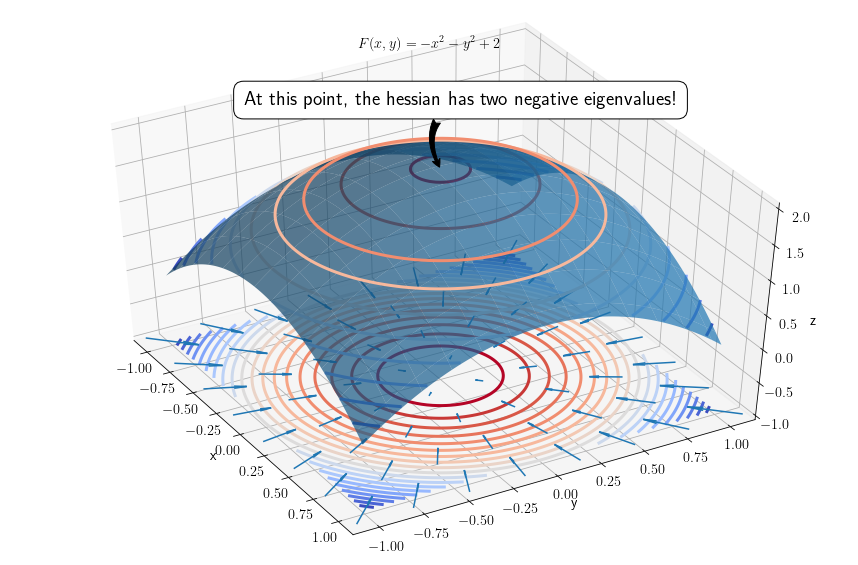

In [358]:
x, y = sp.symbols('x, y')


# This function can be replaced!
F = -x**2 + -y**2 + 2
DF = [sp.diff(F,x,1),sp.diff(F,y,1)]



F_num = sp.lambdify((x,y),F)
DF_num = sp.lambdify((x,y),DF)


plot(F_num,DF_num)
plt.title("$F(x,y) = "+sp.latex(F)+"$")

ax = plt.gca()
label = annotate3D(
    ax,"At this point, the hessian has two negative eigenvalues!", 
    xyz = (0,0,2), xytext = (20, 60),
    textcoords = 'offset points', ha = 'center', va = 'bottom',
    fontsize=20, zorder=100,
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white'),
    arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=0.5', color='black'))


plt.savefig('quadratic.png')

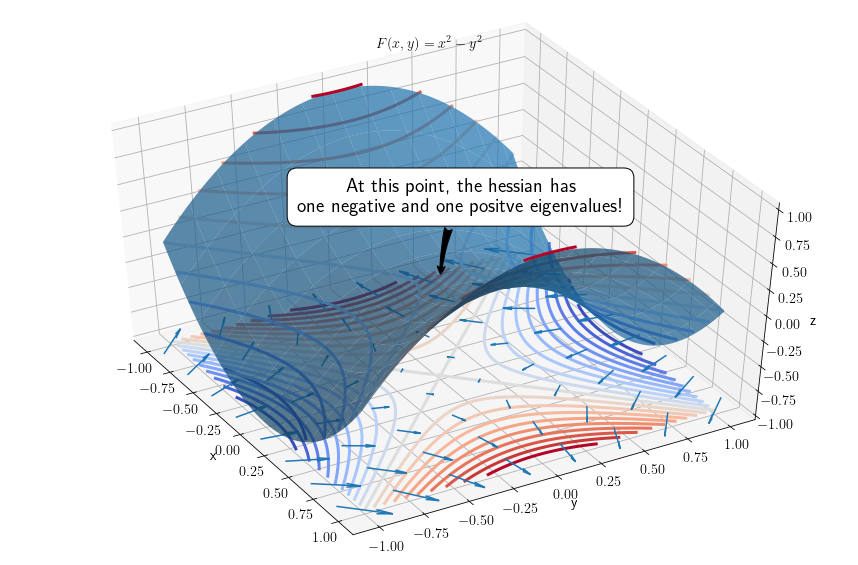

In [359]:
x, y = sp.symbols('x, y')

# This function can be replaced!
F = x**2 - y**2
DF = [sp.diff(F,x,1),sp.diff(F,y,1)]


F_num = sp.lambdify((x,y),F)
DF_num = sp.lambdify((x,y),DF)
plot(F_num,DF_num)
plt.title("$F(x,y) = "+sp.latex(F)+"$")

ax = plt.gca()
label = annotate3D(
    ax,"At this point, the hessian has \n one negative and one positve eigenvalues!", 
    xyz = (0,0,0), xytext = (20, 60),
    textcoords = 'offset points', ha = 'center', va = 'bottom',
    fontsize=20,zorder=100,
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white'),
    arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=0.1', color='black'))


plt.savefig('saddle_point.png')

### Example of an higher dimensional Taylor Expansion



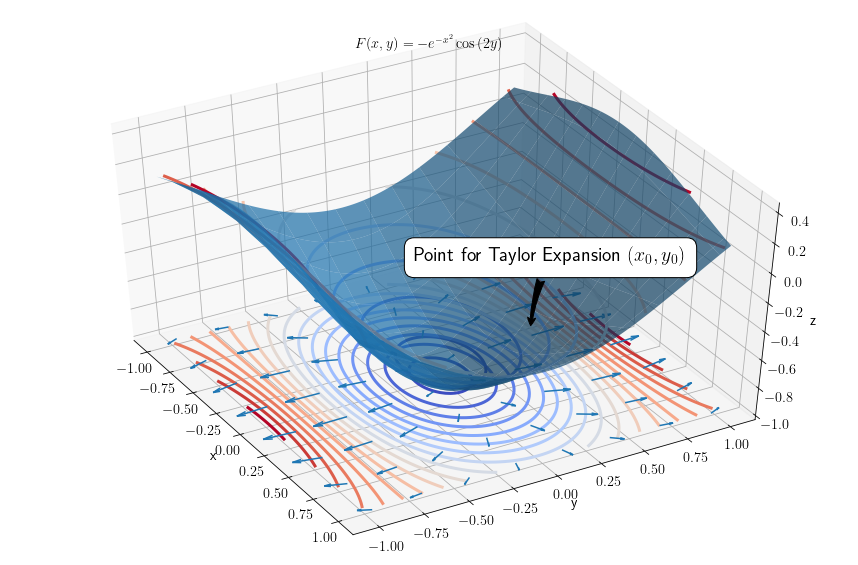

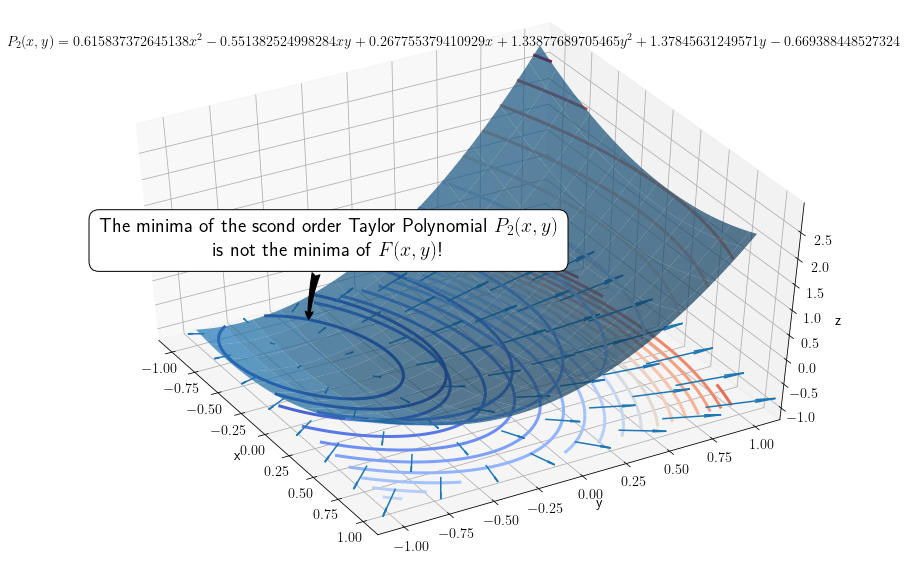

In [360]:
x, y = sp.symbols('x, y')
X = [x,y]

# ignore these few functions
def diff(f):
    return [f.diff(xi) for xi in X]

def hess(f):
    return [[f.diff(xi).diff(yi) for xi in X] for yi in X]

def at_X0(f,x0,y0):
    return f.subs(x,x0).subs(y,y0)


# This function can be replaced!
F = -sp.exp(-x*x)*sp.cos(2*y)
DF = diff(F)
DDF = hess(F)

x0 = 0.2
y0 = 0.4
F_taylor = (at_X0(F,x0,y0) + at_X0(DF[0],x0,y0)*x + at_X0(DF[1],x0,y0)*y + 0.5* at_X0(DDF[0][0],x0,y0)*x**2
  + at_X0(DDF[0][1],x0,y0)*x*y + 0.5* at_X0(DDF[1][1],x0,y0)*y**2)
DF_taylor = diff(F_taylor)

F_num = sp.lambdify((x,y),F)
DF_num = sp.lambdify((x,y),DF)
DDF_num = sp.lambdify((x,y),DDF)



plot(F_num,DF_num)
plt.title("$F(x,y) = "+sp.latex(F)+"$")

ax = plt.gca()
label = annotate3D(
    ax,"Point for Taylor Expansion $(x_0,y_0)$", 
    xyz = (x0,y0,F_num(x0,y0)), xytext = (20, 60),
    textcoords = 'offset points', ha = 'center', va = 'bottom',
    fontsize=20,zorder=100,
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white'),
    arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=0.1', color='black'))

plt.show()
plt.savefig('min_problem.png')

# Taylor expression

F_taylor_num = sp.lambdify((x,y),F_taylor)
DF_taylor_num = sp.lambdify((x,y),DF_taylor)
plot(F_taylor_num,DF_taylor_num)
plt.title("$P_2(x,y) = "+sp.latex(F_taylor)+"$")

# Find zero
Hess = np.matrix(DDF_num(x0,y0))
Deriv = np.array(DF_num(x0,y0))
(x1,y1) = np.linalg.solve(Hess,-Deriv)
    
ax = plt.gca()
label = annotate3D(
    ax,"The minima of the scond order Taylor Polynomial $P_2(x,y)$\n is not the minima of $F(x,y)$!", 
    xyz = (x1,y1,F_num(x1,y1)), xytext = (20, 60),
    textcoords = 'offset points', ha = 'center', va = 'bottom',
    fontsize=20,zorder=100,
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white'),
    arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=0.1', color='black'))

plt.show()
plt.savefig('min_problem_taylor.png')